## Case Study: Stock Price Prediction 


<h4> The Case study is to predict Next day stock price [Adj Close Price] using  regression analysis</h4>
<p>
    We will be using Nifty 50 data for this case study<br>
    The filename '^NSEI.csv' contains the data<br>
    You need to generate  technical indicators as given below as  Features for converting Time Series to Supervised Learning Problem <br>
   <a href='https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/'> Convert time Series to Supervised Learning</a><p>
    <ul>
        <li> Moving Averages (Example Given : 3Period Moving Avearage (3MA)) </li>
        <li> Previous Day Returns </li>
        <li> Relative Stock returns </li>
    </ul>
<br>
Then you need to Train a Supervised learning algorithm and perform prediction.<br>
<a href='https://blog.quantinsti.com/random-forest-algorithm-in-python/'>Example for your Refrence </a><br>
<b> Make sure  to shift the feature by 1 period so that you will have data from t-1 period to predict price at t (look ahead bias) </b>

<strong> Please consider Testing Period after  01-01-2019 </strong>
</p>
<p>
    <b> Metrics for Evaluation </b>
    <ul>
        <li><strong> RMSE </strong></li>
     </ul>
</p>
<p> Some additional Documention for your help
    <ul>
        <li><a href='https://pandas.pydata.org/docs/'> Pandas Documentation </a> </li>
        <li><a href='https://scikit-learn.org/stable/'> Scikit Learn </a></li>
        </ul>
        </p>

In [773]:
import pandas as pd
import numpy as np
##### Import Other Required Library ###########
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
  


In [774]:
# Reading the Stock 
df=pd.read_csv("^NSEI.csv") #index_col = "Date", parse_dates = True)

In [775]:
# Getting the head of the data
df.head()

Date         Open         High          Low        Close  \
0  2007-09-17  4518.450195  4549.049805  4482.850098  4494.649902   
1  2007-09-18  4494.100098  4551.799805  4481.549805  4546.200195   
2  2007-09-19  4550.250000  4739.000000  4550.250000  4732.350098   
3  2007-09-20  4734.850098  4760.850098  4721.149902  4747.549805   
4  2007-09-21  4752.950195  4855.700195  4733.700195  4837.549805   

     Adj Close  Volume  
0  4494.649902     0.0  
1  4546.200195     0.0  
2  4732.350098     0.0  
3  4747.549805     0.0  
4  4837.549805     0.0

In [776]:
# Selecting Adj Close
df=df[['Date','Adj Close','High','Open','Close','Low']]

In [777]:
df.head()

Date    Adj Close         High         Open        Close          Low
0  2007-09-17  4494.649902  4549.049805  4518.450195  4494.649902  4482.850098
1  2007-09-18  4546.200195  4551.799805  4494.100098  4546.200195  4481.549805
2  2007-09-19  4732.350098  4739.000000  4550.250000  4732.350098  4550.250000
3  2007-09-20  4747.549805  4760.850098  4734.850098  4747.549805  4721.149902
4  2007-09-21  4837.549805  4855.700195  4752.950195  4837.549805  4733.700195

In [778]:
df.head()

Date    Adj Close         High         Open        Close          Low
0  2007-09-17  4494.649902  4549.049805  4518.450195  4494.649902  4482.850098
1  2007-09-18  4546.200195  4551.799805  4494.100098  4546.200195  4481.549805
2  2007-09-19  4732.350098  4739.000000  4550.250000  4732.350098  4550.250000
3  2007-09-20  4747.549805  4760.850098  4734.850098  4747.549805  4721.149902
4  2007-09-21  4837.549805  4855.700195  4752.950195  4837.549805  4733.700195

In [779]:
# checking the index
len(df)

3071

In [780]:
# checking for any missing values
df.isna().any()

Date         False
Adj Close     True
High          True
Open          True
Close         True
Low           True
dtype: bool

In [781]:
#type of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 6 columns):
Date         3071 non-null object
Adj Close    3039 non-null float64
High         3039 non-null float64
Open         3039 non-null float64
Close        3039 non-null float64
Low          3039 non-null float64
dtypes: float64(5), object(1)
memory usage: 144.1+ KB


In [782]:
# checking for any missing values
df.isna().sum()

Date          0
Adj Close    32
High         32
Open         32
Close        32
Low          32
dtype: int64

In [783]:
#dropping the missing values as they could be public holidays or data may be unavailable
#(Hence imputation or interpolation was nit performed)
df.dropna(inplace = True) 

In [784]:
# describing the data df
df.describe()

Adj Close          High          Open         Close           Low
count   3039.000000   3039.000000   3039.000000   3039.000000   3039.000000
mean    7201.282316   7249.022544   7206.244144   7201.282316   7152.517666
std     2468.447937   2469.026355   2472.207308   2468.447937   2469.280590
min     2524.199951   2585.300049   2553.600098   2524.199951   2252.750000
25%     5261.425049   5301.375000   5264.774902   5261.425049   5222.550049
50%     6187.250000   6224.200195   6186.850098   6187.250000   6148.250000
75%     8826.625000   8877.649902   8837.725098   8826.625000   8784.250000
max    12362.299805  12430.500000  12430.500000  12362.299805  12321.400391

AxesSubplot(0.125,0.125;0.775x0.755)


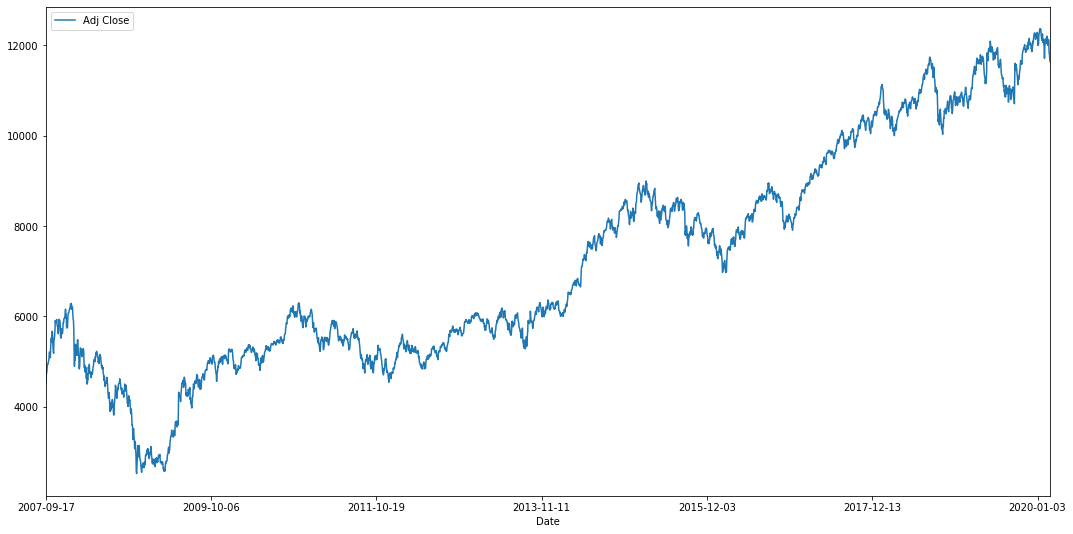

In [785]:
# plotting the dependent variable with the available data
print(df.plot('Date', 'Adj Close',figsize= (18,9) ))

In [786]:
#### Generating a Sample Feature for your Reference 3period moving average
df['2MA']=df['Adj Close'].rolling(2).mean()
### shifting Feature 3MA  so that features at t-1 will be used to predict close at t
df['2MA']=df['2MA'].shift(1)
df['High']=df['High'].shift(1)
df['Low']=df['Low'].shift(1)
df['Open']=df['Open'].shift(1)
df['Close']=df['Close'].shift(1)


In [787]:

# checking the index again
len(df)
df.isna().any()

Date         False
Adj Close    False
High          True
Open          True
Close         True
Low           True
2MA           True
dtype: bool

In [788]:
# checking for any missing values
df.isna().sum()

Date         0
Adj Close    0
High         1
Open         1
Close        1
Low          1
2MA          2
dtype: int64

In [789]:
#dropping the missing values
df.dropna(inplace = True) 

In [790]:
# describing dataset after dropping 2nd variable
df.describe()

Adj Close          High          Open         Close           Low  \
count   3037.000000   3037.000000   3037.000000   3037.000000   3037.000000   
mean    7203.047780   7248.457890   7205.662250   7200.714194   7151.953124   
std     2468.301265   2468.053017   2471.217936   2467.461435   2468.336369   
min     2524.199951   2585.300049   2553.600098   2524.199951   2252.750000   
25%     5262.600098   5302.149902   5265.299805   5262.450195   5224.000000   
50%     6187.299805   6224.200195   6186.850098   6187.250000   6148.250000   
75%     8831.549805   8870.099609   8831.400391   8821.700195   8775.099609   
max    12362.299805  12430.500000  12430.500000  12362.299805  12321.400391   

                2MA  
count   3037.000000  
mean    7199.531473  
std     2466.721161  
min     2554.099976  
25%     5258.200195  
50%     6181.400147  
75%     8807.174804  
max    12353.924805

In [791]:
#defining independent variables
ind_x = df[['2MA','Low']].values


In [792]:
# defining dependent variable
dep_y = df['Adj Close'].values

In [793]:
# Train Test Split  data (Make sure to consider the data is a time series data) since test data should be 2019
# onwards, we use 90.8 percent as train and 9.2 percent as test data
ind_x_train,ind_x_test,dep_y_train,dep_y_test = train_test_split(ind_x, dep_y,test_size=0.092,random_state=0)

In [794]:
len(ind_x_train)

2757

In [795]:
len(ind_x_test)

280

In [796]:
len(dep_y_train)

2757

In [797]:
len(dep_y_test)

280

In [798]:
dep_y_test

array([ 5068.5     ,  5980.      ,  8492.299805,  8835.599609,
        3490.699951,  8323.200195,  5081.700195,  5551.100098,
        5951.299805,  8538.299805,  5225.649902,  7018.700195,
        6241.100098,  5944.      ,  5368.      ,  5066.200195,
        5003.100098, 12018.400391,  4831.25    ,  5054.100098,
        6251.700195,  5545.299805,  5208.649902,  5273.600098,
        5850.299805, 11856.799805, 10982.799805,  9915.25    ,
       10333.25    ,  4202.149902, 10710.450195,  6203.350098,
        5276.899902,  4863.299805,  5592.950195,  5483.299805,
       10918.700195,  5907.5     ,  8914.299805,  5751.950195,
        6016.149902,  7562.399902, 11346.200195,  8218.950195,
       10121.799805,  8550.900391,  4529.899902,  5482.      ,
        8239.75    ,  5550.75    ,  4899.700195,  2714.399902,
        7872.25    , 10440.5     ,  8034.850098,  5231.899902,
        5667.649902,  5872.600098, 10044.099609,  4571.450195,
        5108.899902,  5704.399902, 11586.349609,  7437.

In [799]:
# Train different Algorithms
features = LinearRegression()

features.fit(ind_x_train,dep_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [800]:
print(features.coef_)
y_prediction = features.predict(ind_x_test)



[0.67905128 0.32100751]


In [801]:

final_value = pd.DataFrame({'Actual':dep_y_test.flatten(),'Predicted':y_prediction.flatten()})
final_value.head(1)



Actual    Predicted
0  5068.5  5172.084624

In [802]:
# Test performance of the model on the Testing Data using RMSE
print('MAD', metrics.mean_absolute_error(dep_y_test, y_prediction))
print('MSE', metrics.mean_squared_error(dep_y_test, y_prediction))
print('RMSE', np.sqrt(metrics.mean_squared_error(dep_y_test, y_prediction)))





MAD 59.003586639081085
MSE 5769.630385045028
RMSE 75.95808307905767
